4G5 Coursework Computer Project: rubber elasticity
====

<!--<img src="./isoprene.png" height=200>-->
<img src="./polyisoprene.png" height=200>

In this project, you are going to investigate the elastic properties of rubber. There are many different types of rubber, both synthetic and
natural, the latter mostly derived from the fluids of the [rubber tree](https://en.wikipedia.org/wiki/Hevea_brasiliensis). All of them have a
common structure: extremely long chains of flexible polymers. Different materials vary in the composition of the polymers, whether and how
cross-linked they are. In this project, we are going to consider the polyisoprene molecule, which is the major constitutent of 
natural rubber. Isoprene is a simple hydrocarbon, a naturally very abundant molecule, even humans produce some! To keep things simple, you
will study only a single polymer chain, and to keep the computational effort low, only a short one. This is already sufficient to display
the main phenomenology of elasticity. 

The main objective of the project is to demonstrate the linear restoring force as a function of displacement for the polyisoprene molecule. 
This will be accomplished by _constrained_ molecular dynamics at constant temperature, in which the two ends of the molecule will be kept at a 
given distance apart, and the molecular motion simulated as it explores the allowable conformations. After sufficient 
data is accumulated, the average force on the end points is recorded, and a new, larger distance is set, repeating the previous procedure. You will
need to use error analysis to determine how long a simulation to do at a fixed displacement before moving on to the next one. 

__Your report__ should contain the measured average restoring force as a function of displacement, with appropriate error bars, and brief commentary on what
you have found. Also consider the average internal energy of molecule (also as a function of displacement), and comment on its relationship to the 
restoring force. 

Notes: 

- If you find that you are spending more than 6 hours on the coursework, seek help. This does _not_ include the runtime of the simulation that you use to gather 
your final data (after you've done shorter exploratory work), it is recommended that you run it overnight. Always make an estimate on how
long a given run will take, never start a simulation for which you have no idea when it will finish!
- Don't forget that the coursework is marked anonymously, so make sure that you include a [coursework cover sheet](http://teaching.eng.cam.ac.uk/node/4171) as the
first page of your report that you upload to Moodle. 
- The marking will be focused on your understanding of the modelling and data analysis, rather than on programming. If you are stuck, seek help.


Preliminaries
----

In [67]:
# Pre - Preliminaries
#!pip install numpy # who hasn't got numpy installed?
#!pip install ase
#!pip install torchani

In [68]:
#
# import basic atomistic simulation modules
#
import numpy as np
import ase
from ase.build import bulk
from ase.data.pubchem import pubchem_atoms_search
from ase.visualize import view

In [69]:
# get the structure of isoprene
isoprene = pubchem_atoms_search(smiles="CC=C(C)C")
view(isoprene, viewer='x3d')

In [70]:
# import an energy model 
import sys
sys.path.insert(0, "ANI")
import ani

In [71]:
isoprene.calc = ani.calculator
isoprene.get_potential_energy()

-5346.541799350911

In [72]:
#
# now import the modules we need to run molecular dynamics
#
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.verlet import VelocityVerlet
from ase import units
from ase.md.langevin import Langevin
from ase.io.trajectory import Trajectory


In [59]:
# this initialises the velocities by drawing from the appropriate distribution at T=300K
MaxwellBoltzmannDistribution(isoprene, temperature_K=300) 

# We now create a molecular dynamics object that can be used to run Langevin dynamics
# the parameters after the structure are the time step, the temperature, and the friction constant (in units of picoseconds)
dynamics = Langevin(isoprene, temperature_K=300, timestep=0.5*units.fs, friction=0.01) 


# While the dynamics is running, we want to collect some data! This is achieved by creating a function to the dynamics object
# which gets called after some number of steps, and it can report to us what is happenning to the molecule, record its trajectory, etc. 
xyzfile = open('isoprene.xyz', 'w') # the file we are going to record the structures to, the visualiser application "Ovito" can read such XYZ files. 
def report():
    print("Time: {:.3f} fs  |  Potential Energy: {:.3f} eV  |  Kinetic Energy: {:.3f} K".format(dynamics.get_time()/units.fs, isoprene.get_potential_energy(),
        isoprene.get_kinetic_energy()/(len(isoprene)*(3.0/2.0)*units.kB)))
    ase.io.write(xyzfile, isoprene, format="extxyz")

# notice how we print the kinetic energy in units of Kelvin, but it is not the thermodynamic temperature (which is kept constant)

dynamics.attach(report, interval=1) # the interval argument specifies how many steps of dynamics are run between each call to record the trajectory
dynamics.run(100)
xyzfile.close()
del dynamics

# After execution, you will see a new file called "isoprene.xyz". You can look at it, and see what it records. Download it, and view the molecular
# motion using the "Ovito" application. 

Time: 0.000 fs  |  Potential Energy: -5346.542 eV  |  Kinetic Energy: 416.232 K
Time: 0.500 fs  |  Potential Energy: -5346.516 eV  |  Kinetic Energy: 399.273 K
Time: 1.000 fs  |  Potential Energy: -5346.441 eV  |  Kinetic Energy: 359.765 K
Time: 1.500 fs  |  Potential Energy: -5346.336 eV  |  Kinetic Energy: 311.259 K
Time: 2.000 fs  |  Potential Energy: -5346.245 eV  |  Kinetic Energy: 263.395 K
Time: 2.500 fs  |  Potential Energy: -5346.197 eV  |  Kinetic Energy: 238.621 K
Time: 3.000 fs  |  Potential Energy: -5346.196 eV  |  Kinetic Energy: 236.741 K


Time: 3.500 fs  |  Potential Energy: -5346.228 eV  |  Kinetic Energy: 248.631 K
Time: 4.000 fs  |  Potential Energy: -5346.255 eV  |  Kinetic Energy: 262.883 K
Time: 4.500 fs  |  Potential Energy: -5346.259 eV  |  Kinetic Energy: 263.154 K
Time: 5.000 fs  |  Potential Energy: -5346.237 eV  |  Kinetic Energy: 251.117 K
Time: 5.500 fs  |  Potential Energy: -5346.188 eV  |  Kinetic Energy: 225.789 K
Time: 6.000 fs  |  Potential Energy: -5346.128 eV  |  Kinetic Energy: 194.663 K
Time: 6.500 fs  |  Potential Energy: -5346.071 eV  |  Kinetic Energy: 167.570 K
Time: 7.000 fs  |  Potential Energy: -5346.032 eV  |  Kinetic Energy: 146.532 K
Time: 7.500 fs  |  Potential Energy: -5346.021 eV  |  Kinetic Energy: 135.928 K
Time: 8.000 fs  |  Potential Energy: -5346.046 eV  |  Kinetic Energy: 150.934 K
Time: 8.500 fs  |  Potential Energy: -5346.107 eV  |  Kinetic Energy: 186.230 K
Time: 9.000 fs  |  Potential Energy: -5346.194 eV  |  Kinetic Energy: 231.571 K
Time: 9.500 fs  |  Potential Energy: -53

In [60]:
# Ovito also helps you to select atoms by dragging the "Particles/GLobal Attributes" tab upwards a bit,
# and selecting the little target crosshairs on the left, then clicking on individual atoms. The "ParticleIndex" variable tells you the order
# of the atoms in the file and the ASE atoms object. 

# For example, particle indices 8 and 13 correspond to two H atoms on opposite ends of the isoprene molecule, and we can get their distance:
dr = (isoprene.get_positions()[8,:]-isoprene.get_positions()[13,:])
print("relative displacement vector:", dr)
r = np.linalg.norm(dr)
print("distance: ", r)
dru = dr/np.linalg.norm(dr)
print("unit vector in the same direction:", dru)

relative displacement vector: [ 5.51262628 -0.66268528 -0.50415491]
distance:  5.575156718992844
unit vector in the same direction: [ 0.98878409 -0.11886397 -0.09042883]


Exercise 1 : dynamics and autocorrelation
----

Run molecular dynamics of isoprene, and record the distance between atoms 8 and 13 (two hydrogens) every 10 steps. Plot the time evolution
of this distance, and calculate the autocorrelation function. Run the trajectory long enough that you sample the methyl groups rotating around
the C-C bond. Repeat the exercise at higher temperature (e.g. 500 K), what happens to the autocorrelation function ? 

Note: you can calculate the autocorrelation yourself, or learn to use the `acf` function in  `statsmodels.tsa.stattools`

Polyisoprene
---

In [61]:
# we now create a polyisoprene molecule
polyisoprene = pubchem_atoms_search(smiles="CC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)C")
view(polyisoprene, viewer='x3d')

/Users/mac/anaconda3/lib/python3.11/site-packages/ase/data/pubchem.py:80: UserWarning: The structure "CC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)C" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  warnings.warn(


/Users/mac/anaconda3/lib/python3.11/site-packages/ase/md/md.py:52: FutureWarning: Specify the temperature in K using the 'temperature_K' argument
  warnings.warn(FutureWarning(w))


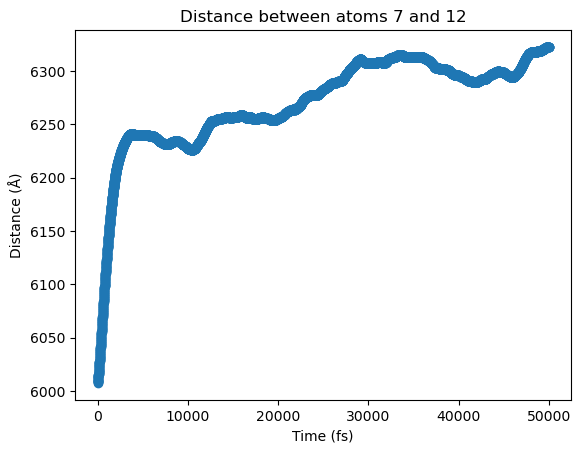

In [75]:
def get_distance(
    molecule, 
    calculator, 
    temperature_K,
    atom_indices, 
    timestep=0.5 * units.fs,  # MD time step
    friction=0.01,            # friction in 1/ps
    nsteps=1000,              # total MD steps
    interval=10               # record data every 'interval' steps
):
    """
    Run molecular dynamics on the given molecule at a specified temperature
    using a Langevin integrator. Record the distance between two specified atoms
    at regular intervals.

    Parameters
    ----------
    molecule : ASE Atoms object
        The molecule on which MD is performed (e.g., isoprene).
    calculator : ASE Calculator
        The energy/forces calculator (e.g., your ANI calculator).
    temperature_K : float
        The target temperature in Kelvin.
    atom_indices : tuple of int
        The indices of the two atoms (zero-based!) between which the distance
        is recorded. Example: (7, 12) if you want the distance between 
        the 8th and 13th atoms in 1-based counting.
    timestep : float
        The MD time step. Default is 0.5 fs.
    friction : float
        The friction constant in ps^-1. Default is 0.01.
    nsteps : int
        How many MD steps to run. Default is 1000.
    interval : int
        How often (in steps) to record data. Default is 10.
    
    Returns
    -------
    times : np.ndarray
        Times (in fs) at which the distance is recorded.
    distances : np.ndarray
        Distance (in Angstrom) between the two specified atoms at those times.
    """
    
    # Assign the calculator to your molecule
    molecule.calc = calculator

    # Unpack the atom indices (0-based!)
    i, j = atom_indices

    # Initialize Python lists to store times and distances
    times = []
    distances = []

    # Initialize velocities according to Maxwell-Boltzmann at the given temperature
    MaxwellBoltzmannDistribution(molecule, temperature_K)

    # Set up Langevin dynamics
    dynamics = Langevin(
        molecule,
        temperature_K=temperature_K,
        timestep=timestep,
        friction=friction
    )
    
    def report():
        """Function called at every 'interval' steps to record distance and time."""
        current_time_fs = dynamics.get_time() / units.fs
        dr = molecule.get_positions()[i] - molecule.get_positions()[j]
        distance_ij = np.linalg.norm(dr)
        
        times.append(current_time_fs)
        distances.append(distance_ij)

    # Attach reporter function
    dynamics.attach(report, interval=interval)

    # Run the simulation for nsteps steps
    dynamics.run(nsteps)

    return np.array(times), np.array(distances)

polyisoprene.calc = ani.calculator
atom_indices = (7, 12)  # if you want the "8th" and "13th" atoms in 1-based indexing
times, distances = get_distance(
    molecule=polyisoprene,
    calculator=polyisoprene.calc,
    temperature_K=300,
    atom_indices=atom_indices,
    timestep=0.5 * units.fs,
    friction=0.01,
    nsteps=12000,      # run for 2000 steps
    interval=10       # record distance every 10 steps
)

# Then you can plot the distance vs. time with, e.g., matplotlib:
import matplotlib.pyplot as plt

plt.plot(times, distances, '-o')
plt.xlabel('Time (fs)')
plt.ylabel('Distance (Å)')
plt.title('Distance between atoms {} and {}'.format(*atom_indices))
plt.show()

Exercise 2: fixing atoms
---
If you create a dynamics object from an atoms object that has a constraint set, the dynamics will obey that constraint. Run a short dynamics
trajectory of polyisoprene with the constraint below, and verify with Ovito that indeed the selected atoms are not moving. 

In [65]:
# we will need the ability to run molecular dynamics with constraints: the positions of two atoms at the ends of the molecule should be fixed
# the following module enables this
from ase.constraints import FixAtoms

# suppose we have identified that the atoms with indices 27 and 29 are the ones we are going to held fixed, the following
# command achieves this:
polyisoprene.set_constraint(FixAtoms(indices=[27,29]) )

Exercise 3: stretching
----

Similarly to the reporting function above, we can create a function that stretches the molecule, by simply moving one of the "fixed" atoms by a
small amount, thus increasing the distance between our "fixed" atoms. Write a function that:
- calculates the distance between the atoms,
- calculate the new position of one of the fixed atoms, so that it is slightly further away
- sets that new position for your fixed atom

You can either :

1. attach this function to the dynamics object (you can attach multiple functions to a dynamics object), and call it frequently, so the stretching is "continuous"
1. run the dynamics for a set number of steps, then call your function, and run the dynamics again for a set number of steps, etc. you can either call your stretching
function "by hand", outside the dynamics run, or attach your function to the dynamics but only have it be called very infrequently. 

Obviously, if you choose method 1 the stretch amount has to be much much smaller than in method 2 for an equivalent overall stretch rate, because it is being applied much more frequently. 
Test your setup by running a short dynamics. Initially, make the distance adjustments frequent and large (e.g. 2%) so that you can see that it is being done correctly by inspecting your short trajectory in Ovito. 

Main Task
---
Create a moleculary dynamics simulation in which you stretch the molecule very slowly, and measure the restoring force as a function
of displacement (I suggest using method 2 from above). 
Notes: 
- You are  interested in the force _between_ the two molecules held fixed (i.e. the force difference) and only in the component of the force along
the line connecting the two fixed atoms. 
- It is enough to record the structure every 100 steps or so, and be prepared to run the simulation for 100,000 steps or more for each fixed distance.
- I recommend that you create and record the trajectory first, and the analyse it afterwards, because the main computational cost is creating the trajectory. 
- When analysing the data, do not include data immediately after each stretch, allow the system to relax towards the equilibrium distribution for a few
thousand steps before collecting the force data.
- Calculate the autocorrelation of the restoring force value and use it to compute error bars on your measurement

In [66]:
# here is a way to read a previously recorded trajectory and computing the force between two atoms along a given direction (the example uses
# the single isoprene trajectory from an earlier exercise)
f = []
for a in ase.io.read("isoprene.xyz", index=":"):
    f.append((a.get_forces()[8,:]-a.get_forces()[13,:]) @ dru) # dru is the variable holding the unit vector between these atoms, calculated earlier
f

[0.232742628355887,
 0.9060365246513135,
 1.7297240551627888,
 2.3830171460086333,
 2.5593909972639217,
 2.5268938299882686,
 2.2939102233874356,
 1.5320556129475706,
 0.4869877300856492,
 -0.3709680501412855,
 -1.1256226542528986,
 -1.8362550453572,
 -2.3628193828940853,
 -2.715323465786733,
 -2.898703854479224,
 -2.9783705392176687,
 -2.9315361436394167,
 -2.768305978325616,
 -2.353153563698507,
 -1.8026879981881234,
 -1.0665166264412729,
 -0.34009708301300173,
 0.43745349355774166,
 1.3472192536200671,
 2.32957607068286,
 2.673220862562164,
 2.825747019432605,
 2.7785490306201264,
 2.2596324935792924,
 1.5799904290938398,
 0.9477139076113759,
 0.3051679540382948,
 -0.2164944171335476,
 -0.6404827702238757,
 -1.0222110888861622,
 -1.2601343692444305,
 -1.415402431949307,
 -1.511443787139312,
 -1.5201560069084774,
 -1.3212835882529708,
 -1.0385051606687155,
 -0.6203352549749687,
 -0.04938755893349081,
 0.5816144363776504,
 1.2313267960832672,
 1.9756764818034072,
 2.314041447064134,
 

Optional extension
---

The fact that the restoring force is entropic in origin has implications for the temperature dependence of the restoring force. Repeat the main task for
different temperature settings of the Langevin dynamics, and compare the results!